# How data collection and preparation are the foundation for trusted ML models
Step 1. Extract<br/>
    a. Features and target should not have null values<br/>
    b. Features should not be non-numeric<br/>
    c. Features should be of the type array or dataframe<br/>
    d. features should be in the form of rows and columns<br/>

Step 2. Split into training and testing sets<br/>
    e. Features should be on the same scale<br/>

Step 3. Train the model on trainig dataset

Step 4. Test the model on testing dataset

Step 5. predict on unlabeled dataset

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df=pd.read_csv(r"C:\Users\karth\Downloads\19_420_bundle_archive (1)\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
y=df["Species"]


In [27]:
X=df.drop(["Id","Species"],axis=1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [33]:
X.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

In [34]:
type(X)

pandas.core.frame.DataFrame

In [35]:
X.shape

(150, 4)

In [36]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

# Train the Model on Training_set

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn=KNeighborsClassifier(n_neighbors=5)

In [47]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

# Testing the Model on Testing Data_set

In [48]:
knn.score(X_test,y_test)

0.9777777777777777

In [54]:
k=[2,3,4,5,6,7,8,9,10]
train_accuracy=[]
test_accuracy=[]

# Training Model With different K-Values 

In [57]:
for i in k:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_acc=knn.score(X_train,y_train)
    train_accuracy.append(train_acc)
    test_acc=knn.score(X_test,y_test)
    test_accuracy.append(test_acc)

In [58]:
 train_accuracy

[0.9904761904761905,
 0.9619047619047619,
 0.9809523809523809,
 0.9714285714285714,
 0.9619047619047619,
 0.9714285714285714,
 0.9714285714285714,
 0.9714285714285714,
 0.9714285714285714]

In [59]:
test_accuracy

[0.9111111111111111,
 0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556,
 0.9333333333333333,
 0.9555555555555556,
 0.9555555555555556]

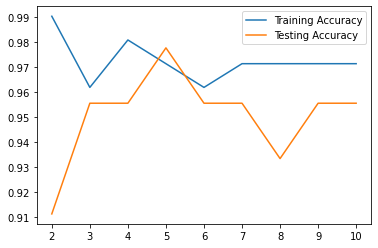

In [66]:
plt.plot(k,train_accuracy,label="Training Accuracy")
plt.plot(k,test_accuracy,label="Testing Accuracy")
plt.legend()
plt.show()